In [55]:
import pandas as pd
data = pd.read_csv('hmelq.csv')
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [56]:
data = data.dropna() 
df = data.copy()
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [58]:
df["bad"].value_counts()

0    1840
1     178
Name: bad, dtype: int64

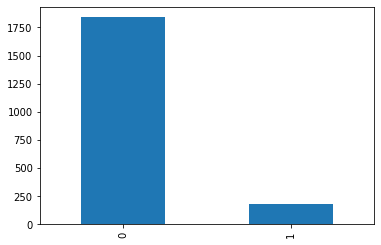

In [59]:
df["bad"].value_counts().plot.bar()

In [60]:
df.describe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,0.088206,19010.257681,76337.035183,106899.244797,9.003964,0.150149,0.264123,180.645020,1.037661,22.265114,34.105829
std,0.283665,10768.607345,44476.368189,54026.707096,7.573012,0.580421,0.789816,84.420116,1.578414,9.457238,8.438411
min,0.000000,1700.000000,5076.000000,23031.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,4.030000
25%,0.000000,12000.000000,49577.250000,71287.250000,3.000000,0.000000,0.000000,118.205000,0.000000,16.000000,29.295500
50%,0.000000,16900.000000,67595.000000,94514.000000,7.000000,0.000000,0.000000,176.670000,0.000000,21.000000,34.949000
75%,0.000000,23600.000000,92922.750000,121220.750000,13.000000,0.000000,0.000000,229.692500,2.000000,27.000000,38.952000
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.230000,13.000000,64.000000,144.189000


In [61]:
dms = pd.get_dummies(data[['reason', 'job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [62]:
X_ = data.drop(['bad', 'reason', 'job'],axis=1)
y = data["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1816, 16), (1816,), (202, 16), (202,))

In [64]:
X_train.head()
X_train.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,job_Mgr,job_Office,job_ProfEx,job_Sales,job_Self
202,11900,89595.0,107895.0,9.0,0.0,0.0,250.47,0.0,24.0,30.305,0,1,0,0,0,0
367,8800,78953.0,93018.0,7.0,0.0,0.0,110.72,0.0,22.0,28.289,1,1,0,0,0,0
1545,26200,149599.0,181869.0,1.0,0.0,0.0,204.03,0.0,35.0,39.801,1,0,0,0,0,0
2197,20400,29985.0,54038.0,15.0,0.0,0.0,177.59,1.0,20.0,35.554,1,0,0,1,0,0
1696,25400,149364.0,210724.0,10.0,0.0,0.0,266.51,1.0,34.0,41.618,0,0,0,0,0,0


In [65]:
import statsmodels.api as sm
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.255671
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2002
Method:                           MLE   Df Model:                           15
Date:                Tue, 01 Oct 2019   Pseudo R-squ.:                  0.1431
Time:                        17:24:17   Log-Likelihood:                -515.94
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 8.341e-29
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -1.932e-05   1.04e-05     -1.861      0.063   -3.97e-05    1.02e-06
mortdue        -1.385e-06   4.94e-06     -0.280      0.779   -1.11e-05     8.3e-06
value          -2.308e-06   4.18e-06     -0.553      0.580   -1.05e-05    5.88e-06
yoj               -0.0345      0.013     -2.698      0.007      -0.060      -0.009
derog              0.5416      0.126      4.314      0.000       0.296       0.788
delinq             0.7600      0.088      8.605      0.000       0.587       0.933
clage             -0.0083      0.001     -6.264      0.000      -0.011      -0.006
ninq               0.0580      0.048      1.212      0.226      -0.036       0.152
clno              -0.0413      0.011     -3.822      0.000      -0.062      -0.020
debtinc            0.0235      0.007      3.303      0.001       0.010       0.037
reason_DebtCon    -0.4757      0.177     -2.690      0.007      -0.822      -0.129
job_Mgr           -0.0941      0.256     -0.367      0.714      -0.597       0.409
job_Office        -0.6638      0.270     -2.459      0.014      -1.193      -0.135
job_ProfEx        -0.2196      0.242     -0.907      0.364      -0.694       0.255
job_Sales          1.0547      0.556      1.898      0.058      -0.035       2.144
job_Self           0.9778      0.518      1.887      0.059      -0.038       1.993
==================================================================================
"""

In [66]:
#Anlamsız değişkenler atılıyor.
X_train = X_train.drop(['loan','mortdue','value','ninq','job_Mgr',
                        'job_ProfEx','job_Sales','job_Self'], 
                       axis = 1)
X_test = X_test.drop(['loan','mortdue','value','ninq','job_Mgr',
                      'job_ProfEx','job_Sales','job_Self'], 
                     axis = 1)

In [67]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = loj_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.99      0.96       184
           1       0.67      0.11      0.19        18

    accuracy                           0.92       202
   macro avg       0.79      0.55      0.57       202
weighted avg       0.90      0.92      0.89       202



In [69]:
loj_model.intercept_, loj_model.coef_

(array([-4.05124172]),
 array([[-0.02095715,  0.61839047,  0.74547265, -0.00512663, -0.02979422,
          0.0855189 , -0.05651833, -0.59401139]]))

In [70]:
y_pred_train = loj_model.predict(X_train)
confusion_mat = confusion_matrix(y_train, y_pred_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("Counfusion matrix: \n",confusion_mat)
print("Accuracy: ",accuracy)

Counfusion matrix: 
 [[1649    7]
 [ 127   33]]
Accuracy:  0.9262114537444934


In [71]:
y_pred = loj_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Counfusion matrix: \n",confusion_mat)
print("Accuracy: ",accuracy)

Counfusion matrix: 
 [[183   1]
 [ 16   2]]
Accuracy:  0.9158415841584159


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       184
           1       0.67      0.11      0.19        18

    accuracy                           0.92       202
   macro avg       0.79      0.55      0.57       202
weighted avg       0.90      0.92      0.89       202



In [73]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.9108771929824563